# Github Copilot

> GitHub Copilot是GitHub和OpenAI合作開發的人工智慧工具，使用者在使用Visual Studio Code、Microsoft Visual Studio、Vim、Cursor或JetBrains整合式開發環境時可以通過GitHub Copilot自動補全代碼。

<img src="./intro.jpeg" height="350"/>

<img src="./29.png" height="500"/>

<img src="./30.jpeg" height="250"/>

<video src="f.mp4" controls height="500">
    Your browser does not support the video tag.
</video>

---

# 資料分析

<img src="./1.png" height="500"/>

In [1]:
import yfinance as yf

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 印出資料
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,56.860001,57.380001,56.840000,57.310001,44.335232,2251500
2010-01-05,57.340000,57.540001,57.110001,57.529999,44.505409,1597700
2010-01-06,57.500000,57.720001,57.410000,57.610001,44.567326,2120300
2010-01-07,57.549999,57.889999,57.290001,57.849998,44.752972,1656700
2010-01-08,57.700001,58.049999,57.560001,58.040001,44.899967,1650000
...,...,...,...,...,...,...
2024-02-28,251.100006,251.960007,250.970001,251.520004,251.520004,2192200
2024-02-29,252.679993,253.300003,251.119995,252.580002,252.580002,2610400
2024-03-01,253.039993,255.070007,252.679993,254.899994,254.899994,3691300


<img src="./23.png" height="500"/>

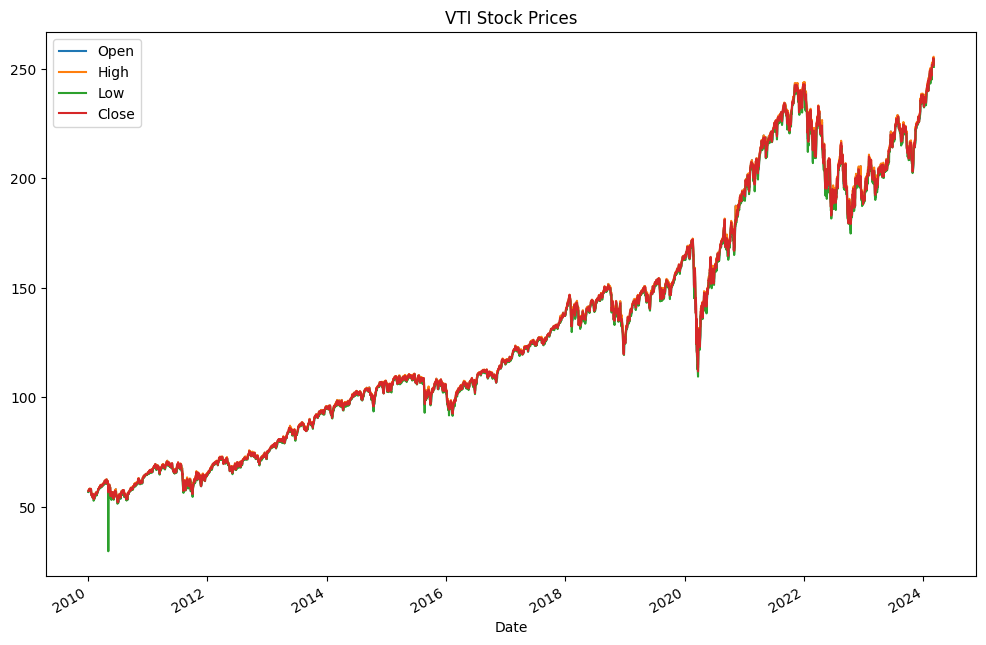

In [2]:
import matplotlib.pyplot as plt

# 確保你的數據已經被排序，特別是如果它是時間序列數據
data = data.sort_index()

# 繪製'Open'、'High'、'Low'和'Close'的線圖
data[['Open', 'High', 'Low', 'Close']].plot(figsize=(12, 8))
plt.title('VTI Stock Prices')
# 顯示圖表
plt.show()

<img src="./24.png" height="500"/>

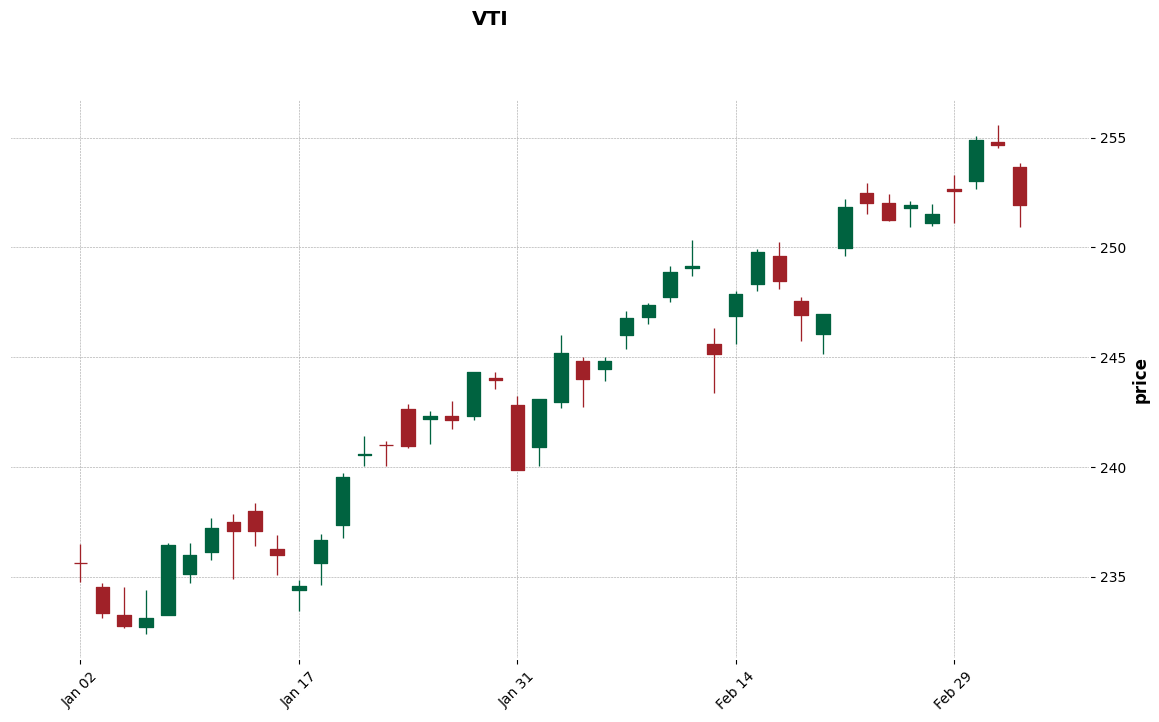

In [3]:
import mplfinance as mpf

# 確保你的數據已經被排序，特別是如果它是時間序列數據
data_2024 = data.loc[data.index.year == 2024]
data_2024 = data_2024.sort_index()

# 繪製K線圖
mpf.plot(data_2024, type='candle', style='charles', title='VTI', ylabel='price',figsize=(15, 8))


<img src="./25.png" height="500"/>

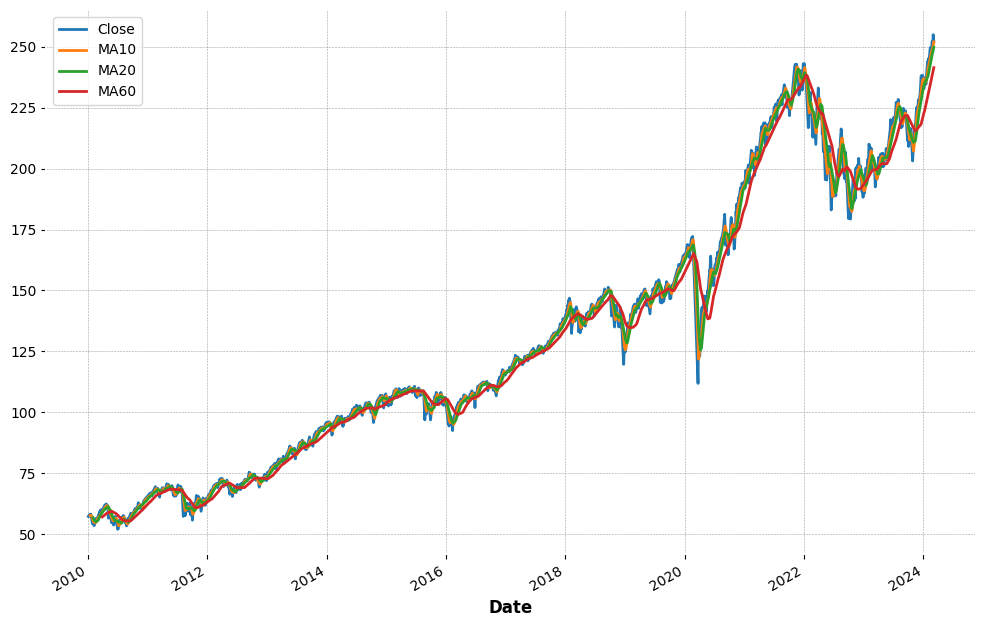

In [4]:
# 計算10日、20日和60日的移動平均線
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA60'] = data['Close'].rolling(window=60).mean()

# 繪製'Close'、'MA10'、'MA20'和'MA60'的線圖
data[['Close', 'MA10', 'MA20', 'MA60']].plot(figsize=(12, 8))

# 顯示圖表
plt.show()

歷史數據報酬回測

<img src="./2.png" height="600"/>

In [5]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值和報酬率
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares
returns = yearly_values.pct_change()

# 印出每年的價值和報酬率
print(yearly_values)
print(returns)

[*********************100%%**********************]  1 of 1 completed

Year
2010    11550.221842
2011    11662.093814
2012    13580.663719
2013    18123.357563
2014    20397.722844
2015    20470.142780
2016    23093.956109
2017    27992.984813
2018    26527.606530
2019    34663.261234
2020    41968.936383
2021    52747.344009
2022    42449.240738
2023    53505.984316
2024    56828.397756
Name: Adj Close, dtype: float64
Year
2010         NaN
2011    0.009686
2012    0.164513
2013    0.334497
2014    0.125494
2015    0.003550
2016    0.128178
2017    0.212135
2018   -0.052348
2019    0.306686
2020    0.210761
2021    0.256819
2022   -0.195235
2023    0.260470
2024    0.062094
Name: Adj Close, dtype: float64


<img src="./3.png" height="500"/>

In [6]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值和報酬率
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares
returns = yearly_values.pct_change()

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate
Year                           
2010  11550.219721          NaN
2011  11662.089083     0.009685
2012  13580.659353     0.164513
2013  18123.347723     0.334497
2014  20397.714137     0.125494
2015  20470.140938     0.003551
2016  23093.951868     0.128177
2017  27992.982750     0.212135
2018  26527.599683    -0.052348
2019  34663.245403     0.306686
2020  41968.928992     0.210762
2021  52747.330393     0.256819
2022  42449.229781    -0.195235
2023  53505.970505     0.260470
2024  56828.383087     0.062094


<img src="./4.png" height="400"/>

<img src="./5.png" height="550"/>

In [7]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares

# 計算報酬率
returns = yearly_values.pct_change()
returns[2010] = (yearly_values[2010] - 10000) / 10000

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate
Year                           
2010  11550.219721     0.155022
2011  11662.089083     0.009685
2012  13580.659353     0.164513
2013  18123.347723     0.334497
2014  20397.714137     0.125494
2015  20470.140938     0.003551
2016  23093.951868     0.128177
2017  27992.982750     0.212135
2018  26527.599683    -0.052348
2019  34663.245403     0.306686
2020  41968.928992     0.210762
2021  52747.330393     0.256819
2022  42449.229781    -0.195235
2023  53505.970505     0.260470
2024  56828.383087     0.062094


<img src="./6.png" height="500"/>

In [8]:
import yfinance as yf
import pandas as pd

# 定義股票代碼和日期範圍
ticker = 'VTI'
start_date = '2010-01-01'

# 使用 yfinance 下載股價資料
data = yf.download(ticker, start=start_date)

# 計算2010年第一個交易日可以購買的股數
first_day_price = data['Adj Close'][0]
shares = 10000 / first_day_price

# 計算每年的價值
data['Year'] = data.index.year
yearly_values = data.groupby('Year')['Adj Close'].last() * shares

# 計算報酬率並轉換為百分比
returns = yearly_values.pct_change()
returns[2010] = (yearly_values[2010] - 10000) / 10000
returns = returns * 100

# 將每年的價值和報酬率存入一個 DataFrame
result = pd.DataFrame({
    'Yearly Value': yearly_values,
    'Return Rate (%)': returns
})

# 印出結果
print(result)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate (%)
Year                               
2010  11550.219721        15.502197
2011  11662.089083         0.968547
2012  13580.659353        16.451343
2013  18123.347723        33.449689
2014  20397.714137        12.549372
2015  20470.140938         0.355073
2016  23093.951868        12.817747
2017  27992.982750        21.213480
2018  26527.599683        -5.234823
2019  34663.245403        30.668609
2020  41968.928992        21.076167
2021  52747.330393        25.681860
2022  42449.229781       -19.523454
2023  53505.970505        26.046976
2024  56828.383087         6.209424


<img src="./7.png" height="500"/>

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

def calculate_returns(ticker, start_date, initial_investment=10000):
    # 使用 yfinance 下載股價資料
    data = yf.download(ticker, start=start_date)

    # 計算開始日期的交易日可以購買的股數
    first_day_price = data['Adj Close'][0]
    shares = initial_investment / first_day_price

    # 計算每年的價值
    data['Year'] = data.index.year
    yearly_values = data.groupby('Year')['Adj Close'].last() * shares

    # 計算報酬率並轉換為百分比
    returns = yearly_values.pct_change()
    returns[data.index.year[0]] = (yearly_values[data.index.year[0]] - initial_investment) / initial_investment
    returns = returns * 100

    tol_return = (yearly_values.tail(1).values[0] - initial_investment) / initial_investment * 100
    
    # 將每年的價值和報酬率存入一個 DataFrame
    result = pd.DataFrame({
        'Yearly Value': yearly_values,
        'Return Rate (%)': returns,
        'Total Return (%)': tol_return        
    })

    return result


# 使用函數
VTI = calculate_returns('VTI', '2010-01-01')
print(VTI)

[*********************100%%**********************]  1 of 1 completed

      Yearly Value  Return Rate (%)  Total Return (%)
Year                                                 
2010      11550.22            15.50            468.28
2011      11662.09             0.97            468.28
2012      13580.66            16.45            468.28
2013      18123.35            33.45            468.28
2014      20397.71            12.55            468.28
2015      20470.14             0.36            468.28
2016      23093.95            12.82            468.28
2017      27992.98            21.21            468.28
2018      26527.60            -5.23            468.28
2019      34663.25            30.67            468.28
2020      41968.93            21.08            468.28
2021      52747.33            25.68            468.28
2022      42449.23           -19.52            468.28
2023      53505.97            26.05            468.28
2024      56828.38             6.21            468.28


<img src="./28.png" height="550"/>

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

def calculate_returns(ticker, start_date, initial_investment=10000):
    # 使用 yfinance 下載股價資料
    data = yf.download(ticker, start=start_date)

    # 計算開始日期的交易日可以購買的股數
    first_day_price = data['Adj Close'][0]
    shares = initial_investment / first_day_price

    # 計算每年的價值
    data['Year'] = data.index.year
    yearly_values = data.groupby('Year')['Adj Close'].last() * shares

    # 計算報酬率並轉換為百分比
    returns = yearly_values.pct_change()
    returns[data.index.year[0]] = (yearly_values[data.index.year[0]] - initial_investment) / initial_investment
    returns = returns * 100

    tol_return = (yearly_values.tail(1).values[0] - initial_investment) / initial_investment * 100
    
    # 計算 CAGR
    years = len(yearly_values)
    cagr = (yearly_values.tail(1).values[0] / yearly_values.head(1).values[0]) ** (1 / years) - 1
    cagr = cagr * 100

    # 計算波動率
    volatility = np.std(returns) * np.sqrt(years)

    # 計算夏普比率
    risk_free_rate = 0.04  # 假設無風險利率為2%
    excess_returns = returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()

    # 將每年的價值、報酬率、CAGR、波動率和夏普比率存入一個 DataFrame
    result = pd.DataFrame({
        'Yearly Value': yearly_values,
        'Return Rate (%)': returns,
        'Total Return (%)': tol_return,
        'CAGR (%)': cagr,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    })

    return result


# 使用函數
VTI = calculate_returns('VTI', '2010-01-01')
VTI

[*********************100%%**********************]  1 of 1 completed


,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2010,11550.22,15.50,468.28,11.21,54.34,0.91
2011,11662.09,0.97,468.28,11.21,54.34,0.91
2012,13580.66,16.45,468.28,11.21,54.34,0.91
2013,18123.35,33.45,468.28,11.21,54.34,0.91
2014,20397.71,12.55,468.28,11.21,54.34,0.91
2015,20470.14,0.36,468.28,11.21,54.34,0.91
2016,23093.95,12.82,468.28,11.21,54.34,0.91
2017,27992.98,21.21,468.28,11.21,54.34,0.91
2018,26527.60,-5.23,468.28,11.21,54.34,0.91


<img src="./8.png" height="500"/>

[*********************100%%**********************]  1 of 1 completed


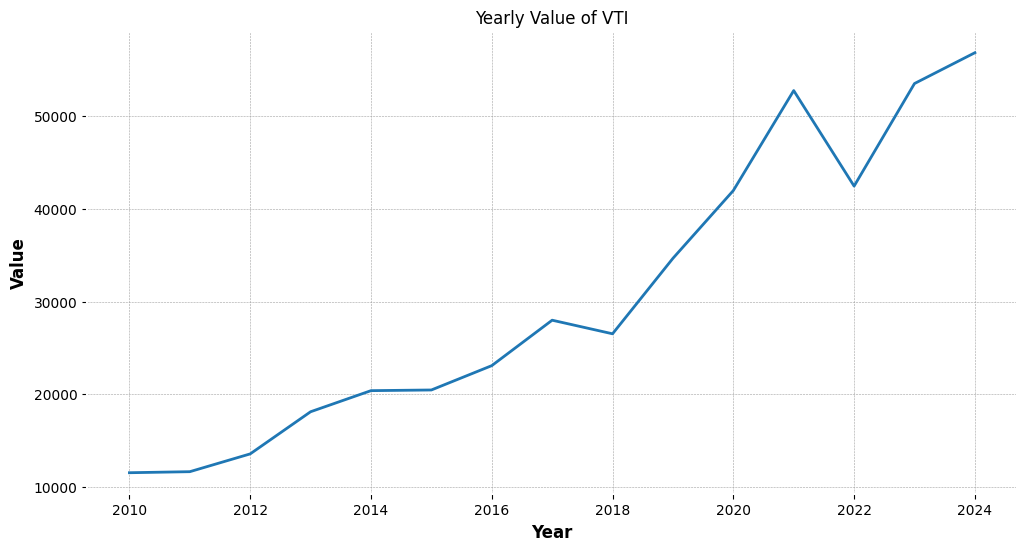

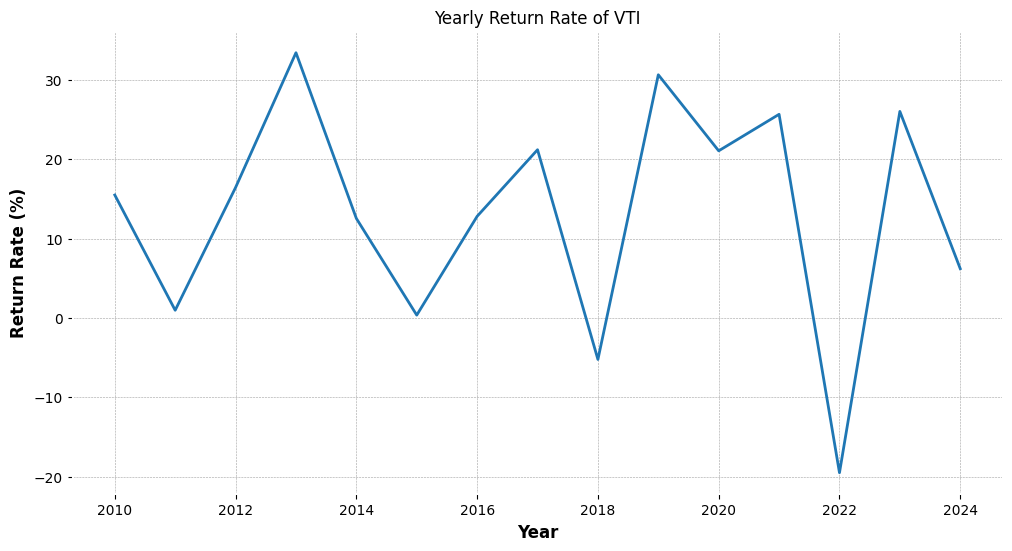

In [11]:
import matplotlib.pyplot as plt

# 使用函數計算價值和報酬率
result = calculate_returns('VTI', '2010-01-01')

# 繪製價值的圖表
plt.figure(figsize=(12, 6))
plt.plot(result['Yearly Value'])
plt.title('Yearly Value of VTI')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 繪製報酬率的圖表
plt.figure(figsize=(12, 6))
plt.plot(result['Return Rate (%)'])
plt.title('Yearly Return Rate of VTI')
plt.xlabel('Year')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.show()

<img src="./9.png" height="500"/>

In [12]:
import matplotlib.pyplot as plt

def plot_data(result, ticker):
    # 繪製價值的圖表
    plt.figure(figsize=(12, 6))
    plt.plot(result['Yearly Value'])
    plt.title(f'Yearly Value of {ticker}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()


In [13]:
AAPL = calculate_returns('AAPL', '2010-01-01')
TSLA =   calculate_returns('TSLA', '2010-01-01')
NVDA =  calculate_returns('NVDA', '2010-01-01')
TSM =  calculate_returns('TSM', '2010-01-01')
MU =  calculate_returns('MU', '2010-01-01')
QQQ =  calculate_returns('QQQ', '2010-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010      15072.20            50.72           2529.07     21.00      124.52   
2011      18924.35            25.56           2529.07     21.00      124.52   
2012      25087.42            32.57           2529.07     21.00      124.52   
2013      27111.86             8.07           2529.07     21.00      124.52   
2014      38125.37            40.62           2529.07     21.00      124.52   
2015      36976.38            -3.01           2529.07     21.00      124.52   
2016      41591.19            12.48           2529.07     21.00      124.52   
2017      61748.08            48.46           2529.07     21.00      124.52   
2018      58419.76            -5.39           2529.07     21.00      124.52   
2019     110388.71            88.96           2529.07     21.00      124.52   
2020     201246.02            82.31           2529.0

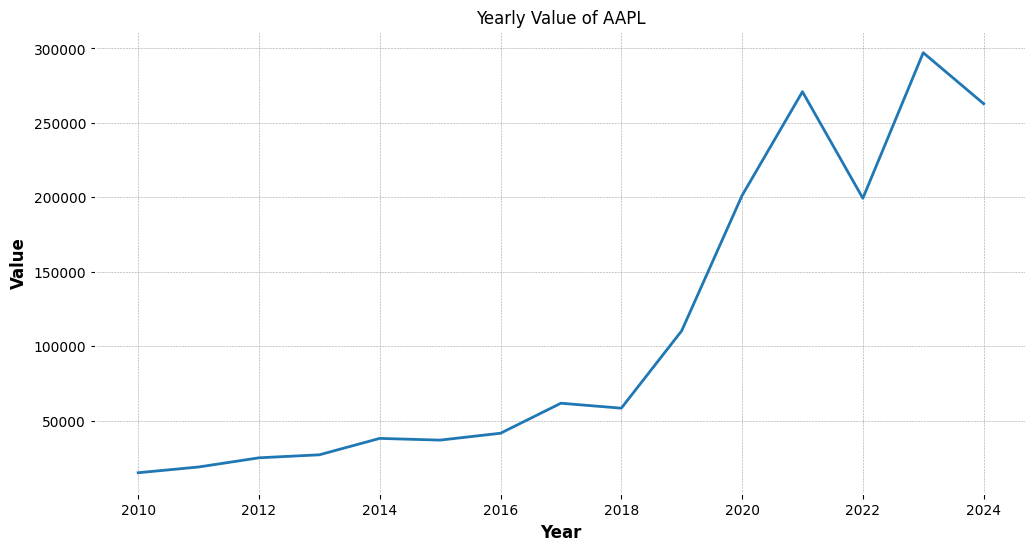

In [14]:
print(AAPL)
plot_data(AAPL, 'AAPL')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010      11146.92            11.47          11248.26     36.10      762.11   
2011      11954.79             7.25          11248.26     36.10      762.11   
2012      14177.48            18.59          11248.26     36.10      762.11   
2013      62967.76           344.14          11248.26     36.10      762.11   
2014      93097.51            47.85          11248.26     36.10      762.11   
2015     100464.62             7.91          11248.26     36.10      762.11   
2016      89447.45           -10.97          11248.26     36.10      762.11   
2017     130326.47            45.70          11248.26     36.10      762.11   
2018     139305.12             6.89          11248.26     36.10      762.11   
2019     175106.70            25.70          11248.26     36.10      762.11   
2020    1476914.70           743.44          11248.2

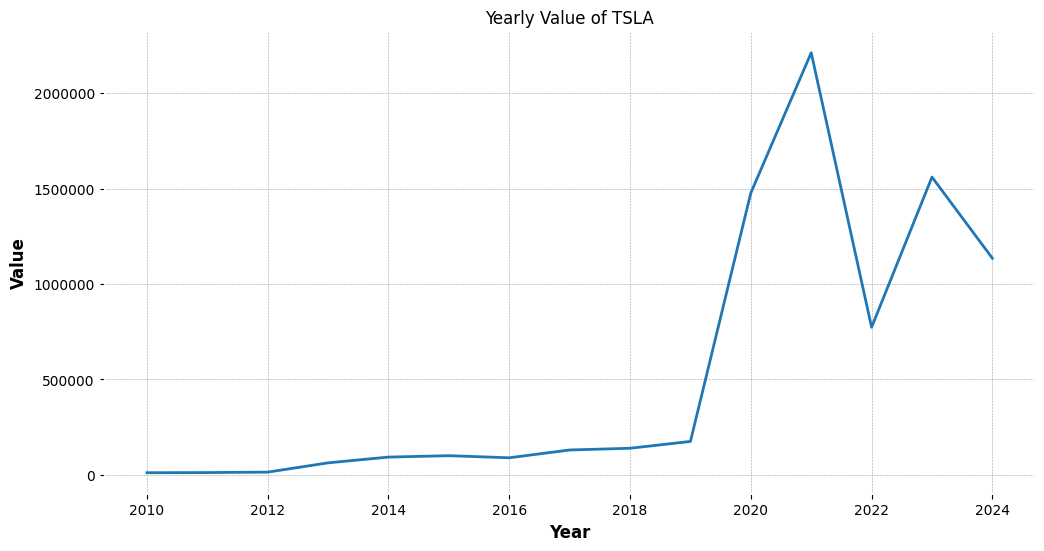

In [15]:
print(TSLA)
plot_data(TSLA, 'TSLA')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010       8328.83           -16.71          20173.44     44.24      326.93   
2011       7495.95           -10.00          20173.44     44.24      326.93   
2012       6673.39           -10.97          20173.44     44.24      326.93   
2013       8910.57            33.52          20173.44     44.24      326.93   
2014      11351.68            27.40          20173.44     44.24      326.93   
2015      18970.43            67.12          20173.44     44.24      326.93   
2016      62025.77           226.96          20173.44     44.24      326.93   
2017     112879.42            81.99          20173.44     44.24      326.93   
2018      78095.34           -30.82          20173.44     44.24      326.93   
2019     138184.27            76.94          20173.44     44.24      326.93   
2020     307177.62           122.30          20173.4

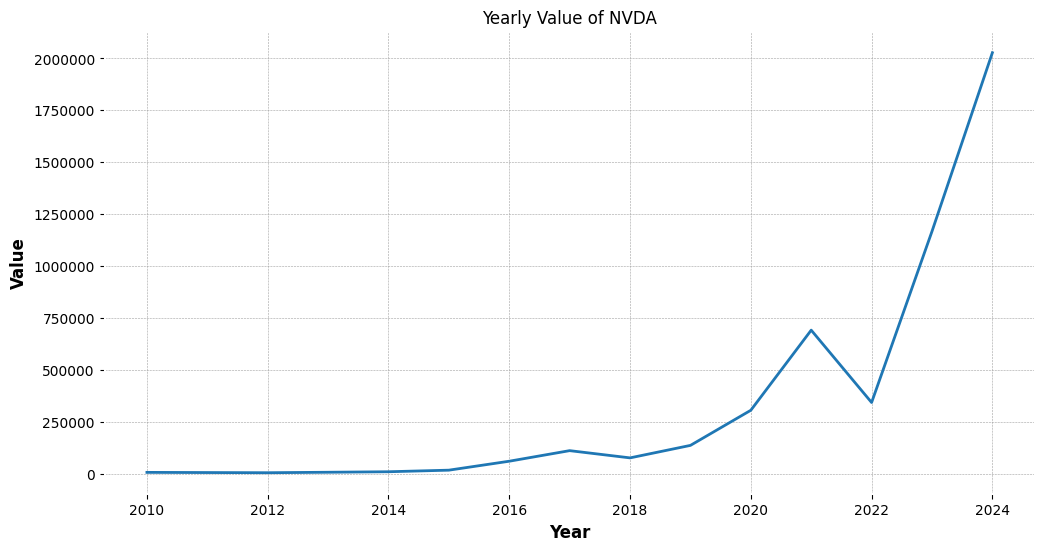

In [16]:
print(NVDA)
plot_data(NVDA, 'NVDA')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010      11368.11            13.68           1709.72     20.26      114.41   
2011      12197.33             7.29           1709.72     20.26      114.41   
2012      16796.63            37.71           1709.72     20.26      114.41   
2013      17546.84             4.47           1709.72     20.26      114.41   
2014      23023.81            31.21           1709.72     20.26      114.41   
2015      24148.42             4.88           1709.72     20.26      114.41   
2016      31662.68            31.12           1709.72     20.26      114.41   
2017      45089.76            42.41           1709.72     20.26      114.41   
2018      43508.97            -3.51           1709.72     20.26      114.41   
2019      71721.03            64.84           1709.72     20.26      114.41   
2020     138183.73            92.67           1709.7

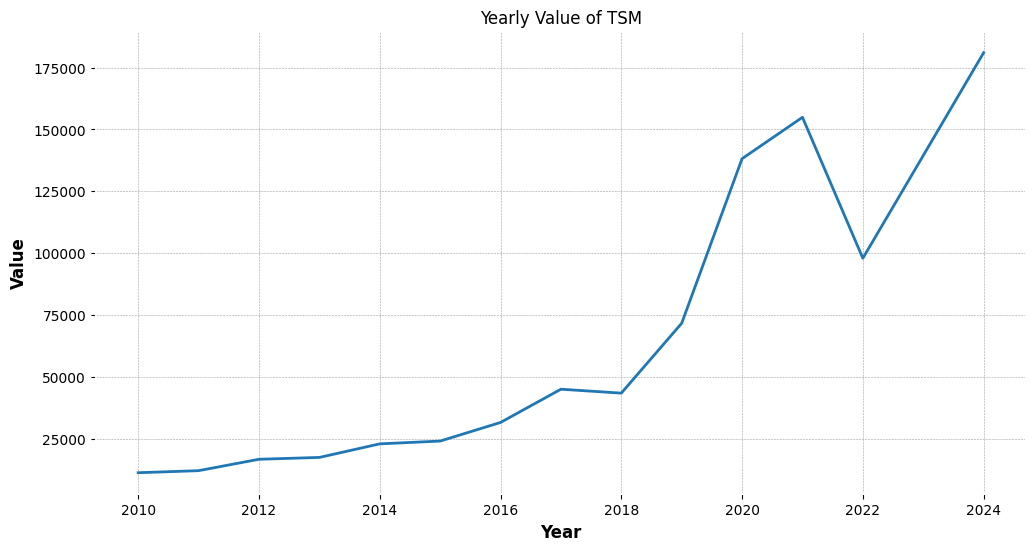

In [17]:
print(TSM)
plot_data(TSM, 'TSM')


      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010       7391.71           -26.08            785.68     18.01      277.93   
2011       5797.23           -21.57            785.68     18.01      277.93   
2012       5843.32             0.79            785.68     18.01      277.93   
2013      20046.08           243.06            785.68     18.01      277.93   
2014      32267.27            60.97            785.68     18.01      277.93   
2015      13050.69           -59.55            785.68     18.01      277.93   
2016      20202.76            54.80            785.68     18.01      277.93   
2017      37898.61            87.59            785.68     18.01      277.93   
2018      29244.24           -22.84            785.68     18.01      277.93   
2019      49566.82            69.49            785.68     18.01      277.93   
2020      69290.31            39.79            785.6

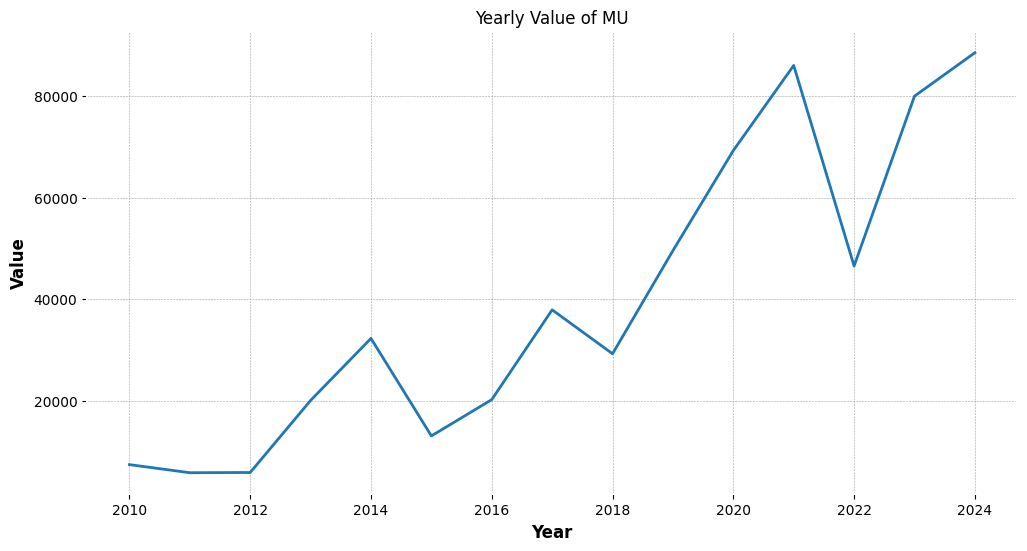

In [18]:
print(MU)
plot_data(MU, 'MU')

      Yearly Value  Return Rate (%)  Total Return (%)  CAGR (%)  Volatility  \
Year                                                                          
2010      11840.97            18.41            969.09     15.80       82.31   
2011      12252.54             3.48            969.09     15.80       82.31   
2012      14471.78            18.11            969.09     15.80       82.31   
2013      19773.40            36.63            969.09     15.80       82.31   
2014      23566.21            19.18            969.09     15.80       82.31   
2015      25789.90             9.44            969.09     15.80       82.31   
2016      27620.44             7.10            969.09     15.80       82.31   
2017      36642.25            32.66            969.09     15.80       82.31   
2018      36596.02            -0.13            969.09     15.80       82.31   
2019      50854.39            38.96            969.09     15.80       82.31   
2020      75471.02            48.41            969.0

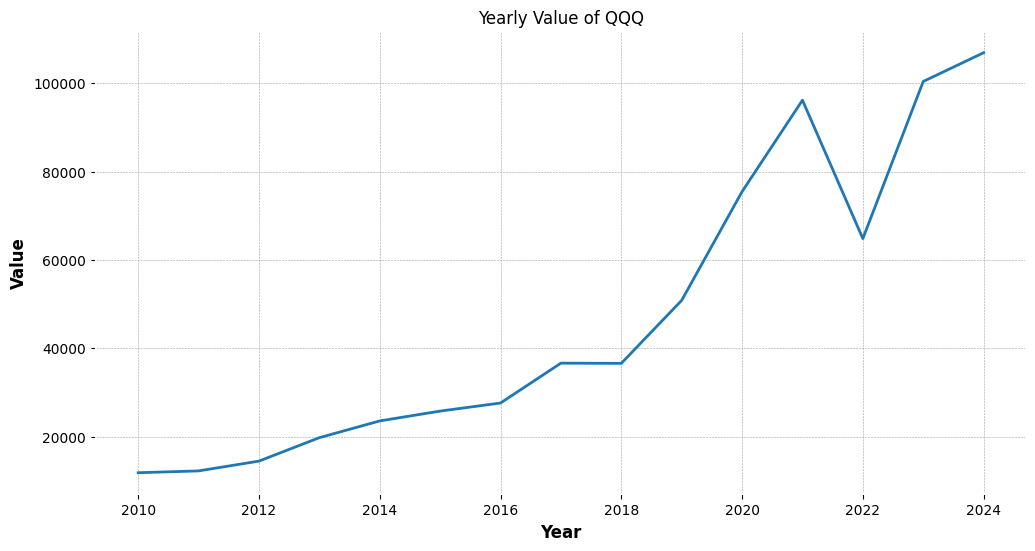

In [19]:
print(QQQ)
plot_data(QQQ, 'QQQ')

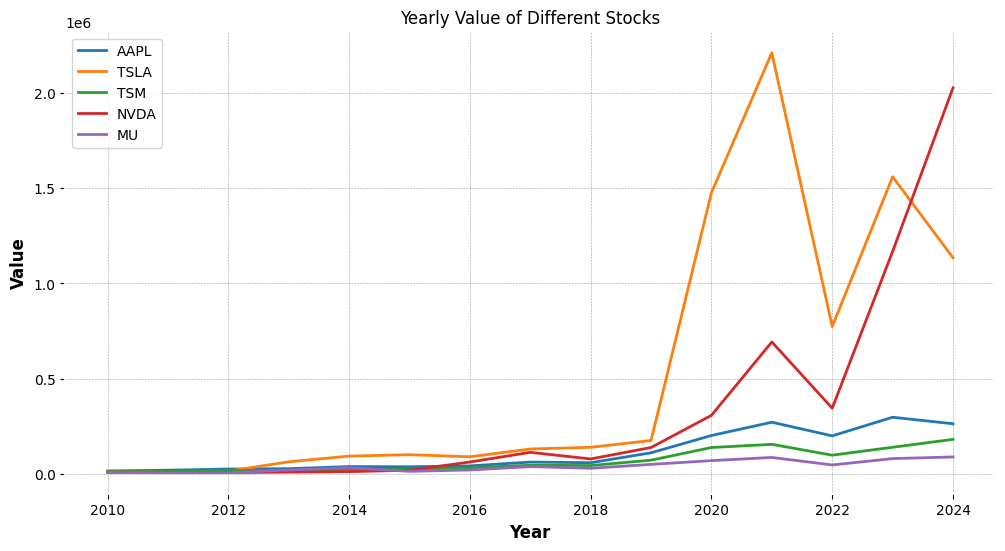

In [20]:
import matplotlib.pyplot as plt

# 繪製所有股票的年度價值
plt.figure(figsize=(12, 6))
plt.plot(AAPL['Yearly Value'], label='AAPL')
plt.plot(TSLA['Yearly Value'], label='TSLA')
plt.plot(TSM['Yearly Value'], label='TSM')
plt.plot(NVDA['Yearly Value'], label='NVDA')
plt.plot(MU['Yearly Value'], label='MU')
plt.title('Yearly Value of Different Stocks')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

畫兩張圖比較所有股票的CAGR與夏普比率

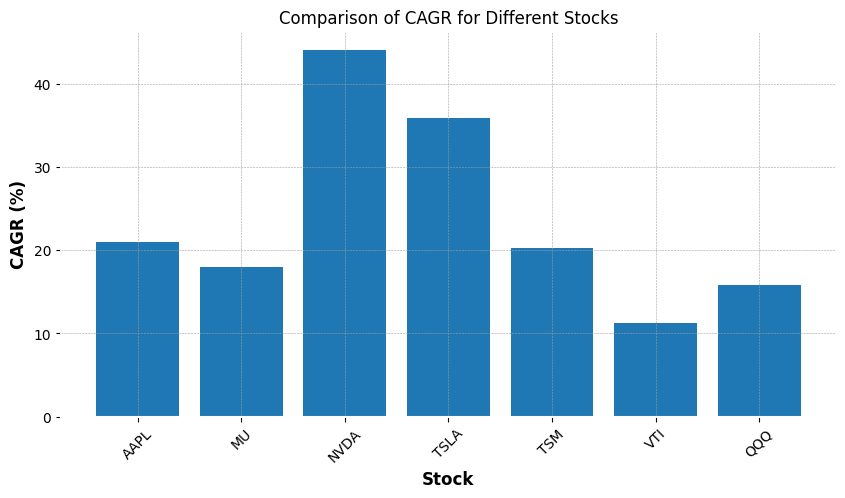

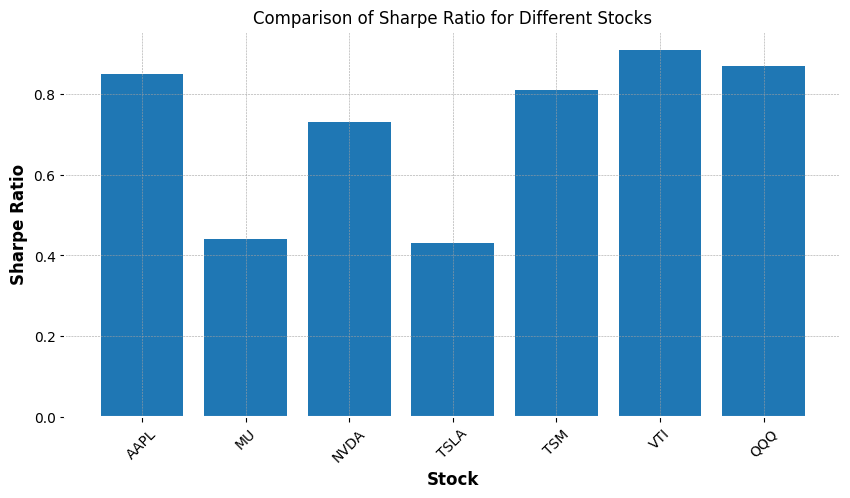

In [21]:
import matplotlib.pyplot as plt

# Define the stock names and their corresponding CAGR and Sharpe Ratio values
stock_names = ['AAPL', 'MU', 'NVDA', 'TSLA', 'TSM', 'VTI', 'QQQ']
cagr_values = [21.01, 17.99, 44.07, 35.95, 20.25, 11.21, 15.80]
sharpe_ratio_values = [0.85, 0.44, 0.73, 0.43, 0.81, 0.91, 0.87]

# Plot the CAGR values
plt.figure(figsize=(10, 5))
plt.bar(stock_names, cagr_values)
plt.xlabel('Stock')
plt.ylabel('CAGR (%)')
plt.title('Comparison of CAGR for Different Stocks')
plt.xticks(rotation=45)
plt.show()

# Plot the Sharpe Ratio values
plt.figure(figsize=(10, 5))
plt.bar(stock_names, sharpe_ratio_values)
plt.xlabel('Stock')
plt.ylabel('Sharpe Ratio')
plt.title('Comparison of Sharpe Ratio for Different Stocks')
plt.xticks(rotation=45)
plt.show()
